# Information score ranking

This Jupyter Notebook takes a certain database as an input and marks different articles in how informative they are.

How "informative" an article is, depends on how unique the words are that are listed in the article. If most articles contain the word "Shell", for example, that word isn't considered as unique as a word like "azc" that may appear less in documents regarding Shell's gas winnings.

In [1]:
import pandas as pd

EXCEL_SHEET = 'preprocessed_data.xlsx'
OUTPUT_FILE = 'data.csv'

## Classification of the database

We start by reading the file.

In [2]:
df = pd.read_excel(EXCEL_SHEET)
df

,Unnamed: 0,id,type,date,betterDate,title,abstract
0,18,13.16,Overig,2015,NaT,Verzoek_regulier__facultatief_advies_uitgebr_p...,\n\n\n\n\n13.16 \n \n\nOns briefkenmerk: ...
1,29,8.17,Correspondentie,2007-2013,NaT,Toezicht_ Correspondentie n.a.v. Toezicht en H...,\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...
2,31,22.11,Mail,??,NaT,FW Draaiboek demonstratie NAM AZC 24 sept...,"\n\n\nDate : 1-1-0001 00:00:00 \nTo : ""Marco O..."
3,32,32.3,Correspondentie,NaN,NaT,Uitgaande mail mededeling akkoord bijdrage aan...,\n\n\n\n\n| bijdrage gemeente Assen Pagina 1 \...
4,35,8.10,Vergunning,1997,NaT,Rapportage n.a.v. vergunningen-meldingen.pdf_j...,\n\n\n\n\n \ncle) \n \n\n\n\n\n\n\n\n\n\n\n...
...,...,...,...,...,...,...,...
2504,2537,32.1,Bestuurlijk besluit,2005-04-26 00:00:00,NaT,BenW besluit BB54473 inzake deelname gem Assen...,\n\n\nÀ \n\nfifi Gemeente Assen \n\n\n\n \n...
2505,2538,32.5,Document,2005-04-01 00:00:00,NaT,Persbericht Energy Valley_,\n\n\n\n\n32.5 \n \n\nÓ Gemeente Assen \n...
2506,2539,3.35,Mail,2004-12-13 00:00:00,2016-09-09 10:47:53,Melding betoging 24 september NAM,\n\n\n\n\n\n\nDate : 9-9-2016 10:47:53 \nF B n...
2507,2540,3.40,Document,2004-12-13 00:00:00,NaT,Locaties in Groningen_,\n\n\nCentrale meldkamer NAM Assen (CMK) \n\nB...


Now that the file is extracted, we may classify the words that appear in the articles.

In [3]:
CLASSIFIED_WORDS = {}

def break_up(value):
    """
        Filter the value and then split it up per word.
    """
    return [word for word in str(value).replace('\t', ' ')
                                       .replace('\n', ' ')
                                       .replace('\r', ' ')
                                       .lower().split(' ') if word != '']

def add_words_to_dictionary(value):
    """
        Add words from a certain DataFrame-cell into the
        `CLASSIFIED_WORDS` dictionary.
    """
    value = break_up(value)
    
    for word in value:
        try:
            CLASSIFIED_WORDS[word] += 1
        except KeyError:
            CLASSIFIED_WORDS[word]  = 1

df['title']   .apply(add_words_to_dictionary)
df['abstract'].apply(add_words_to_dictionary)

CLASSIFIED_WORDS

{'verzoek_regulier__facultatief_advies_uitgebr_proc.doc_dd.': 1,
 'toezicht_': 2,
 'correspondentie': 72,
 'n.a.v.': 164,
 'toezicht': 90,
 'en': 70931,
 'handhaving.pdf_': 2,
 'fw': 360,
 'draaiboek': 110,
 'demonstratie': 75,
 'nam': 11013,
 'azc': 33,
 '24': 1061,
 'september': 1037,
 '2016': 3123,
 '??.pdf': 1,
 'uitgaande': 104,
 'mail': 857,
 'mededeling': 81,
 'akkoord': 305,
 'bijdrage': 461,
 'aan': 20841,
 'st._ongedateerd.pdf': 1,
 'rapportage': 312,
 'vergunningen-meldingen.pdf_juli-dec': 1,
 'diverse': 454,
 'tekeningen.pdf_dd': 1,
 'inkomende': 6,
 '1.pdf_dd': 1,
 'toezicht_rapporteren': 2,
 'vergunning_correspondentie': 3,
 'vergunningen-meldingen.pdf_': 2,
 'diversen_diverse': 1,
 'correspondentie.pdf_': 1,
 'handhaving': 109,
 '1.pdf_': 6,
 '1324187_1404734980943_3b._offerteformulier_inhuur.xls_?.pdf': 1,
 '1674527_1432733943438_3b._offerteformulier_inhuur.xls_?.pdf': 1,
 'brochure': 53,
 'drenthe': 2737,
 '4.0': 284,
 'met': 25123,
 'kaft.pdf_apr.mei': 1,
 '320755_132

This dictionary keeps track of how "rare" a certain word is. The rarer the word, the more informative the article is if that word appears often in the article.

You can run a quick test here to check how often a certain word appears in the database.

In [4]:
try:
    print(f"Dat woord komt {CLASSIFIED_WORDS[input('Noem een woord... ')]} keer voor.")
except KeyError:
    print("Dat woord komt 0 keer voor.")

Noem een woord... ftm
Dat woord komt 0 keer voor.


## Adding a scoring function

To find out how informative a certain function is, we must first define a few functions. These are defined below.

In [5]:
from collections import Counter
import numpy as np

def sigmoid(z):
    """
        Sigmoid function to scale values between 0 and 1.
    """
    return 1 / (1 + np.exp(-1 * z))

def information_rate(value):
    """
        Calculate how much information a certain article contains.
    """
    value = break_up(value)
    total = 0
    
    words = Counter(value)
    
    for word in words:
        if word == '':
            continue
            
        try:
            rarity = CLASSIFIED_WORDS[word]
        except KeyError:
            rarity = 0
        appearance = words[word]
    
        total += appearance * appearance / rarity

    return total

def calculate_information_score(df, shift, scale, power):
    return sigmoid(
        scale * np.log(
            df['title']   .apply(information_rate) + 
            df['abstract'].apply(information_rate)
        ) / (
            df['word_count'] ** power
        ) - math.exp(shift)
    )

For this function, we need to know how many words each article contains. We will calculate this with the code below.

To keep the numbers at comparable sizes, we take the logarithm to keep the numbers within a reasonable scope.

In [6]:
def word_count(value):
    """
        Calculate how many words the value contains.
    """
    return len(break_up(value))

df['word_count'] = np.log2(df['title'].apply(word_count) + df['abstract'].apply(word_count))
df['word_count']

0        9.703904
1       12.215533
2        8.189825
3        6.228819
4        3.169925
          ...    
2504    11.060020
2505     8.696968
2506     8.968667
2507     5.554589
2508    11.653293
Name: word_count, Length: 2509, dtype: float64

We kunnen nu berekenen hoeveel informatie de artikelen bevatten. Met een grafiek kunnen we beoordelen hoe de verdeling loopt van de getallen.

In [7]:
import seaborn as sns
import math

def plot_dataframe(df, size_shift, score_shift, score_scale):
    df['info_score'] = calculate_information_score(df, -1*score_shift, score_scale, -1*size_shift)
    return sns.scatterplot(data=df, x='word_count', y='info_score')

We can now plot the function. See the image below.

Making `size_shift` a high number makes the algorithm prefer long articles. Making `article_size_shift` a low (read: negative) number makes it prefer short articles.

Making `score_shift` a high number makes the algorithm push the dots closer to the top of the score spectrum. Making `score_shift` a low (read: negative) number makes it push the dots closer to the bottom of the score spectrum.

Maki

Changing `score_shift` and `score_scale` doesn't actually change the algorithm's ranking of which articles are the most important, but it helps set a more realistic expectation of the use of articles. The difference between `0.09473` and `0.9481` isn't very meaningful to a human, whereas the difference between `0.5` and `0.7` makes a lot more sense.

**Recommended method:**
1. Start with `size_shift` and `score_shift` at zero, and `score_scale` at 1;
2. Play around with `score_shift` so that most dots are around the middle of the graph, near `0.5`;
3. Shift the balance of `size_shift` so that the algorithm doesn't strongly favour long or short articles;
4. Enlarge the graph with `score_scale` so that most dots are between `0.1` and `0.9`;
5. Repeat from step 2 until you're happy with the way the graph looks.

<AxesSubplot:xlabel='word_count', ylabel='info_score'>

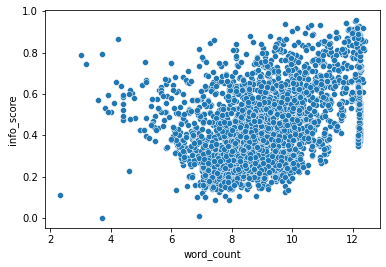

In [8]:
plot_dataframe(df,
                   score_shift = -1.25,
                   size_shift  = -0.9,
                   score_scale = 8
              )

# (-1, -0.9, 8)

## Verifying the use of the current distribution

Your algorithm has finished finding "informative" articles! These articles down below can now show you which articles are valued the most and the least informative by the algorithm.

In [9]:
num = input(f"There are {len(df)} records found. Which one would you like to see first?\nNumber 1 has the least information, number {len(df)} has the most. \n")
entry = df.sort_values(by='info_score').values[int(num)-1]

print("\n\nTITLE: " + entry[5])
print("ABSTRACT:\n" + entry[6])

There are 2509 records found. Which one would you like to see first?
Number 1 has the least information, number 2509 has the most. 
1


TITLE: 2e versie advies winningsplan 
ABSTRACT:



Rapport 
December 2016 
  

1e concept 

Casco Advies Winningsplan 

Westerveld 

 



























































When you're happy with the results, you can export the file using a CSV-format.

In [10]:
round_at = int(input("How many decimals would you like to round the score at? (Recommended: 2)"))

df['info_score'] = df['info_score'].apply(lambda n : round(n, round_at))
to_save = df.drop('word_count', axis=1)
to_save.to_csv(OUTPUT_FILE)

to_save

How many decimals would you like to round the score at? (Recommended: 2)2


,Unnamed: 0,id,type,date,betterDate,title,abstract,info_score
0,18,13.16,Overig,2015,NaT,Verzoek_regulier__facultatief_advies_uitgebr_p...,\n\n\n\n\n13.16 \n \n\nOns briefkenmerk: ...,0.57
1,29,8.17,Correspondentie,2007-2013,NaT,Toezicht_ Correspondentie n.a.v. Toezicht en H...,\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,0.93
2,31,22.11,Mail,??,NaT,FW Draaiboek demonstratie NAM AZC 24 sept...,"\n\n\nDate : 1-1-0001 00:00:00 \nTo : ""Marco O...",0.41
3,32,32.3,Correspondentie,NaN,NaT,Uitgaande mail mededeling akkoord bijdrage aan...,\n\n\n\n\n| bijdrage gemeente Assen Pagina 1 \...,0.61
4,35,8.10,Vergunning,1997,NaT,Rapportage n.a.v. vergunningen-meldingen.pdf_j...,\n\n\n\n\n \ncle) \n \n\n\n\n\n\n\n\n\n\n\n...,0.75
...,...,...,...,...,...,...,...,...
2504,2537,32.1,Bestuurlijk besluit,2005-04-26 00:00:00,NaT,BenW besluit BB54473 inzake deelname gem Assen...,\n\n\nÀ \n\nfifi Gemeente Assen \n\n\n\n \n...,0.86
2505,2538,32.5,Document,2005-04-01 00:00:00,NaT,Persbericht Energy Valley_,\n\n\n\n\n32.5 \n \n\nÓ Gemeente Assen \n...,0.50
2506,2539,3.35,Mail,2004-12-13 00:00:00,2016-09-09 10:47:53,Melding betoging 24 september NAM,\n\n\n\n\n\n\nDate : 9-9-2016 10:47:53 \nF B n...,0.64
2507,2540,3.40,Document,2004-12-13 00:00:00,NaT,Locaties in Groningen_,\n\n\nCentrale meldkamer NAM Assen (CMK) \n\nB...,0.53
